In [1]:
import sys
sys.path.append('../..')
sys.path.append('../../../../transformer_pytorch')
%load_ext autoreload
%autoreload 2

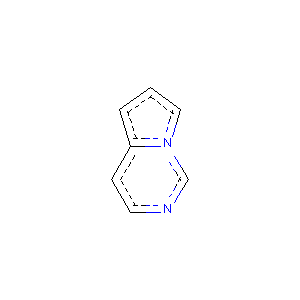

In [12]:

from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import MolToImage, MolToFile, _moltoSVG, MolsToGridImage

smile='c1nccc2n1ccc2'
smile2='OC(=O)O'
mol = Chem.MolFromSmiles(smile)

MolToImage(mol, kekulize=False)

In [3]:
MolToFile(mol, 'test.svg', imageType='svg')

In [4]:
from generative_playground.models.model_settings import get_decoder, get_settings

max_len = 40
settings = get_settings(True, 'new')

# Now let's run a random model with a grammar
model, _ = get_decoder(True,
                    'new',
                    feature_len=settings['feature_len'],
                    max_seq_length=max_len,
                    decoder_type='random',
                   batch_size=9)


['C=NOF', 'C=S', 'C(c1cccc(Br)c1)', 'C=O', 'C=S', 'C(I)', 'C=S', 'C', 'C(Oc1cc(c1ccccc1)cc(F)c1)']
[0, 0, 1, 0, 0, 0, 0, 0, 1]


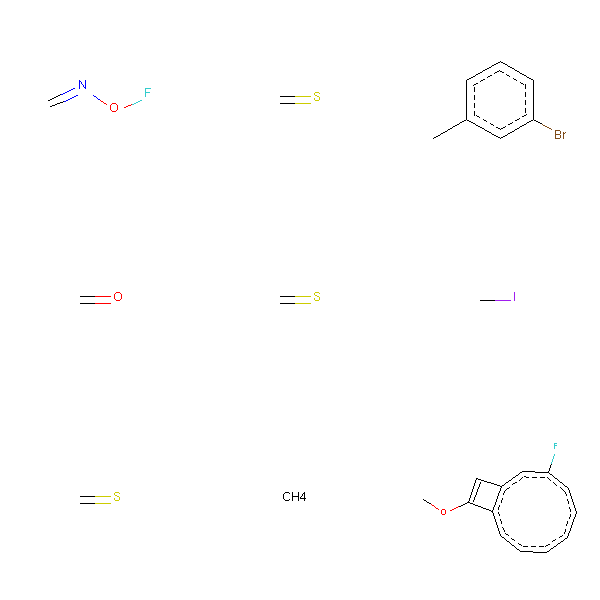

In [15]:
from generative_playground.codec.grammar_codec import GrammarModel
settings = get_settings(True, 'new')
codec = GrammarModel(grammar=settings['grammar'])
actions = model()[0].detach().cpu().numpy()
#print(actions, settings['feature_len'])
my_smiles = codec.decode_from_actions(actions)
print(my_smiles)

mols = [Chem.MolFromSmiles(my_smile) for my_smile in my_smiles]
print([Descriptors.NumAromaticRings(m) for m in mols])
MolsToGridImage(mols, kekulize=False)

In [16]:
fname = '../data/250k_rndm_zinc_drugs_clean.smi'

with open(fname) as f:
    smiles = f.readlines()

for i in range(len(smiles)):
    smiles[i] = smiles[i].strip()


In [19]:
i=-1

12 O=C(N1CCc2c(F)ccc(F)c2C1)C1(O)Cc2ccccc2C1 [2]


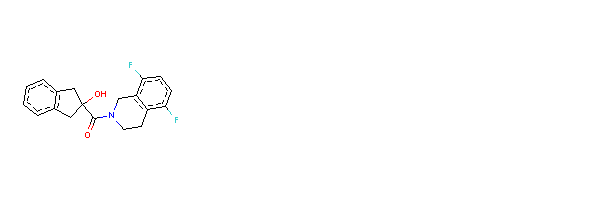

In [32]:
i+=1
my_smile =smiles[i]
mols = [Chem.MolFromSmiles(my_smile)]
print(i, my_smile, [Descriptors.NumAromaticRings(m) for m in mols])
MolsToGridImage(mols, kekulize=False)


In [7]:

# from generative_playground.models import grammar_ed_models as grammar_model

# # We load the auto-encoder
# grammar_weights = '../pretrained/my_molecules.mdl'
# grammar_model = grammar_model.ZincGrammarModel(grammar_weights)
# z = grammar_model.encode(['c1nccc2n1ccc2'])
# new_smile = grammar_model.decode(z)